In [1]:
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import numpy as np
import pandas as pd
import cv2

In [2]:
sys.path.append('../recognition/')

In [41]:
import settings_retrieval
import settings

In [11]:
pd.set_option('display.max_colwidth', -1)

In [42]:
def get_train_fn(img_id):
    return os.path.join(settings.TRAIN_IMG_DIR, img_id[0], img_id[1], img_id[2], '{}.jpg'.format(img_id))

In [19]:
train = pd.read_csv('/mnt/chicm/data/retrieval/train_clean.csv')
test = pd.read_csv('/mnt/chicm/data/retrieval/test.csv')
index = pd.read_csv("/mnt/chicm/data/retrieval/index_clean.csv")
sub = pd.read_csv("/mnt/chicm/data/retrieval/retrieval_sample_submission.csv")

In [43]:
train1 = pd.read_csv('/mnt/chicm/data/landmark/train/train.csv')

In [44]:
train1['fn'] = train1.id.map(lambda x: get_train_fn(x))
train1.head()

,id,url,landmark_id,fn
0,6e158a47eb2ca3f6,https://upload.wikimedia.org/wikipedia/commons/b/b5/Observatoriet_v%C3%A4derkammer_2013a.jpg,142820,/mnt/chicm/data/landmark/train/256/6/e/1/6e158a47eb2ca3f6.jpg
1,202cd79556f30760,http://upload.wikimedia.org/wikipedia/commons/6/63/Ecosse200996-1.jpg,104169,/mnt/chicm/data/landmark/train/256/2/0/2/202cd79556f30760.jpg
2,3ad87684c99c06e1,http://upload.wikimedia.org/wikipedia/commons/2/2c/Pirmasens_Dynamikum.jpg,37914,/mnt/chicm/data/landmark/train/256/3/a/d/3ad87684c99c06e1.jpg
3,e7f70e9c61e66af3,https://upload.wikimedia.org/wikipedia/commons/0/02/Occidental_Vertical.jpg,102140,/mnt/chicm/data/landmark/train/256/e/7/f/e7f70e9c61e66af3.jpg
4,4072182eddd0100e,https://upload.wikimedia.org/wikipedia/commons/5/51/Looking_downstream_from_the_footbridge_over_the_Severn_-_geograph.org.uk_-_532337.jpg,2474,/mnt/chicm/data/landmark/train/256/4/0/7/4072182eddd0100e.jpg


In [ ]:
def square_crop(fn):
    img = cv2.imread(fn)

In [49]:
def show_img(fn):
    img = cv2.imread(fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

def show_imgs(fns, titles=None, size=(20,10)):
    plt.figure(figsize=size)
    columns = 4
    for i, fn in enumerate(fns):
        plt.subplot(len(fns) / columns + 1, columns, i + 1)
        img = cv2.imread(fn)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if titles is not None:
            plt.title(titles[i])
        plt.imshow(img)

In [21]:
train.head()

,id,url,landmark_id,fn
0,97c0a12e07ae8dd5,http://lh4.ggpht.com/-f8xYA5l4apw/RSziSQVaABI/AAAAAAAAASE/V8rWCdC0cvI/s1600/,6347,/mnt/chicm/data/retrieval/train_imgs/97c0a12e07ae8dd5.jpg
1,650c989dd3493748,https://lh5.googleusercontent.com/-PUnMrX7oOyA/TySyn1rpTTI/AAAAAAAAASE/1O6VjsWhkdo/s1600/,12519,/mnt/chicm/data/retrieval/train_imgs/650c989dd3493748.jpg
2,05e63ca9b2cde1f4,http://mw2.google.com/mw-panoramio/photos/medium/31965247.jpg,264,/mnt/chicm/data/retrieval/train_imgs/05e63ca9b2cde1f4.jpg
3,08672eddcb2b7c93,http://lh3.ggpht.com/-9fgSxDYwhHA/SMvGEoltKTI/AAAAAAAAAmQ/okImAMVbiM8/s1600/,13287,/mnt/chicm/data/retrieval/train_imgs/08672eddcb2b7c93.jpg
4,fc49cb32ef7f1e89,http://lh6.ggpht.com/-UGAXxvPbr98/S-jGZbyMIPI/AAAAAAAACjk/cDbltIKSaEs/s1600/,4018,/mnt/chicm/data/retrieval/train_imgs/fc49cb32ef7f1e89.jpg


In [20]:
train['fn'] = train.id.map(lambda x: os.path.join(settings_retrieval.DATA_DIR, 'train_imgs', x+'.jpg'))

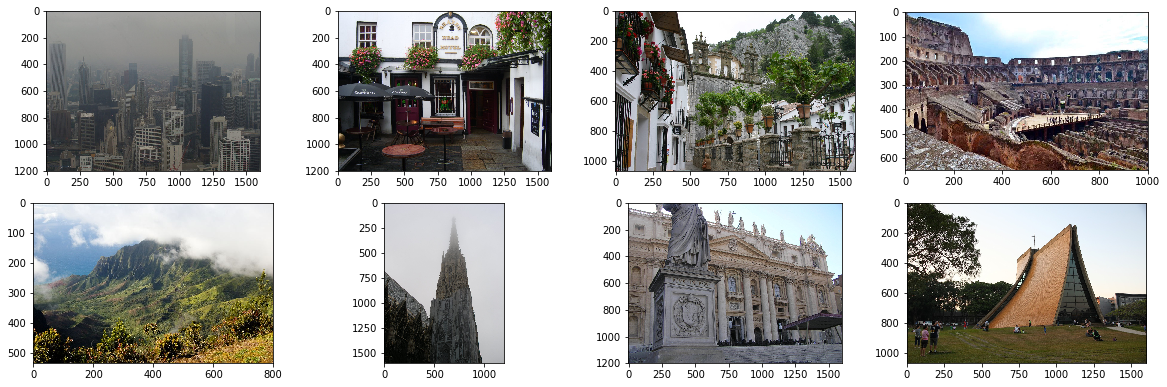

In [50]:
show_imgs(train.sample(8).fn.values)

In [47]:
def sample_landmark_imgs():
    landmark_id = train.sample(1).landmark_id.values[0]
    imgs = train[train.landmark_id==landmark_id].sample(8).fn.values.tolist()
    imgs1 = train1[train1.landmark_id==landmark_id].sample(8).fn.values.tolist()
    fns = imgs+imgs1
    return fns, [landmark_id]*16

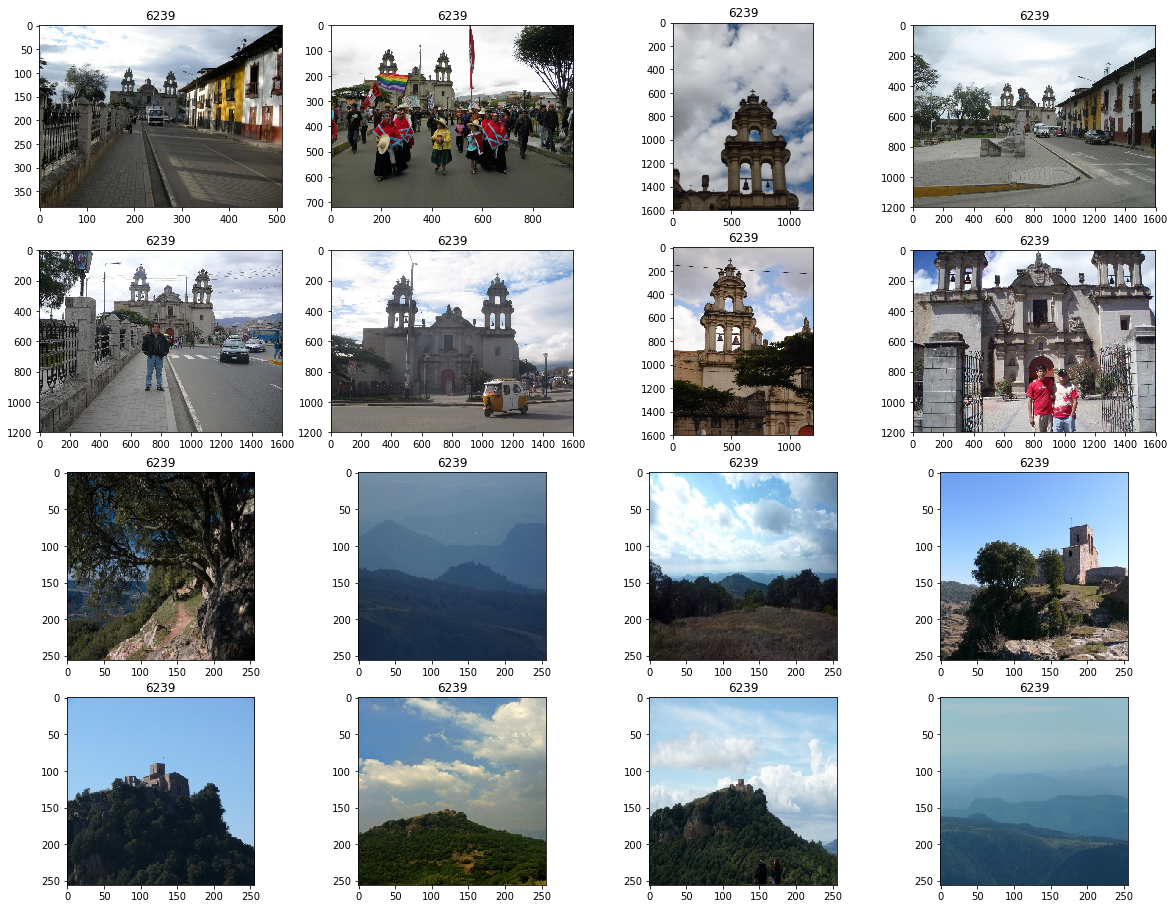

In [57]:
show_imgs(*sample_landmark_imgs(), size=(20, 20))